In [54]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [55]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza w*h
    print("mean ", s.mean)  # srednia
    print("rms ", s.rms)  # pierwiastek średniokwadratowy 
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

In [56]:
im = Image.open('baby_yoda.jpg')
print("tryb obrazu", im.mode)
print("rozmiar", im.size)

tryb obrazu RGB
rozmiar (409, 311)


Metoda Image.filter() 

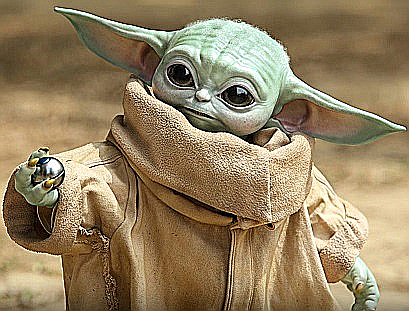

In [57]:
im.filter(ImageFilter.FIND_EDGES) 

In [58]:
print(ImageFilter.FIND_EDGES.filterargs) # wyświetla argumenty filtru

((3, 3), 2, 0, (-1, -1, -1, -1, 10, -1, -1, -1, -1))


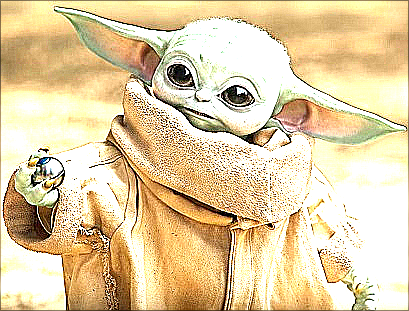

In [59]:
ImageFilter.FIND_EDGES.filterargs = ((3, 3), 1, 0, (-1, -1, -1, -1, 10, -1, -1, -1, -1)) # zmiana argumentów
im.filter(ImageFilter.FIND_EDGES)

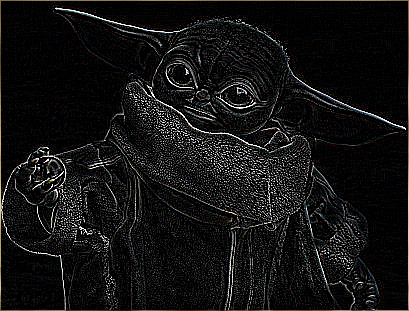

In [60]:
# uniwersalny filtr ImageFilter.Kernel 
im.filter(ImageFilter.Kernel(size = (3, 3), kernel = (-1, -1, -1, -1, 8, -1, -1, -1, -1), scale=1, offset=0))

In [61]:
ImageFilter.EDGE_ENHANCE.filterargs

((3, 3), 2, 0, (-1, -1, -1, -1, 10, -1, -1, -1, -1))

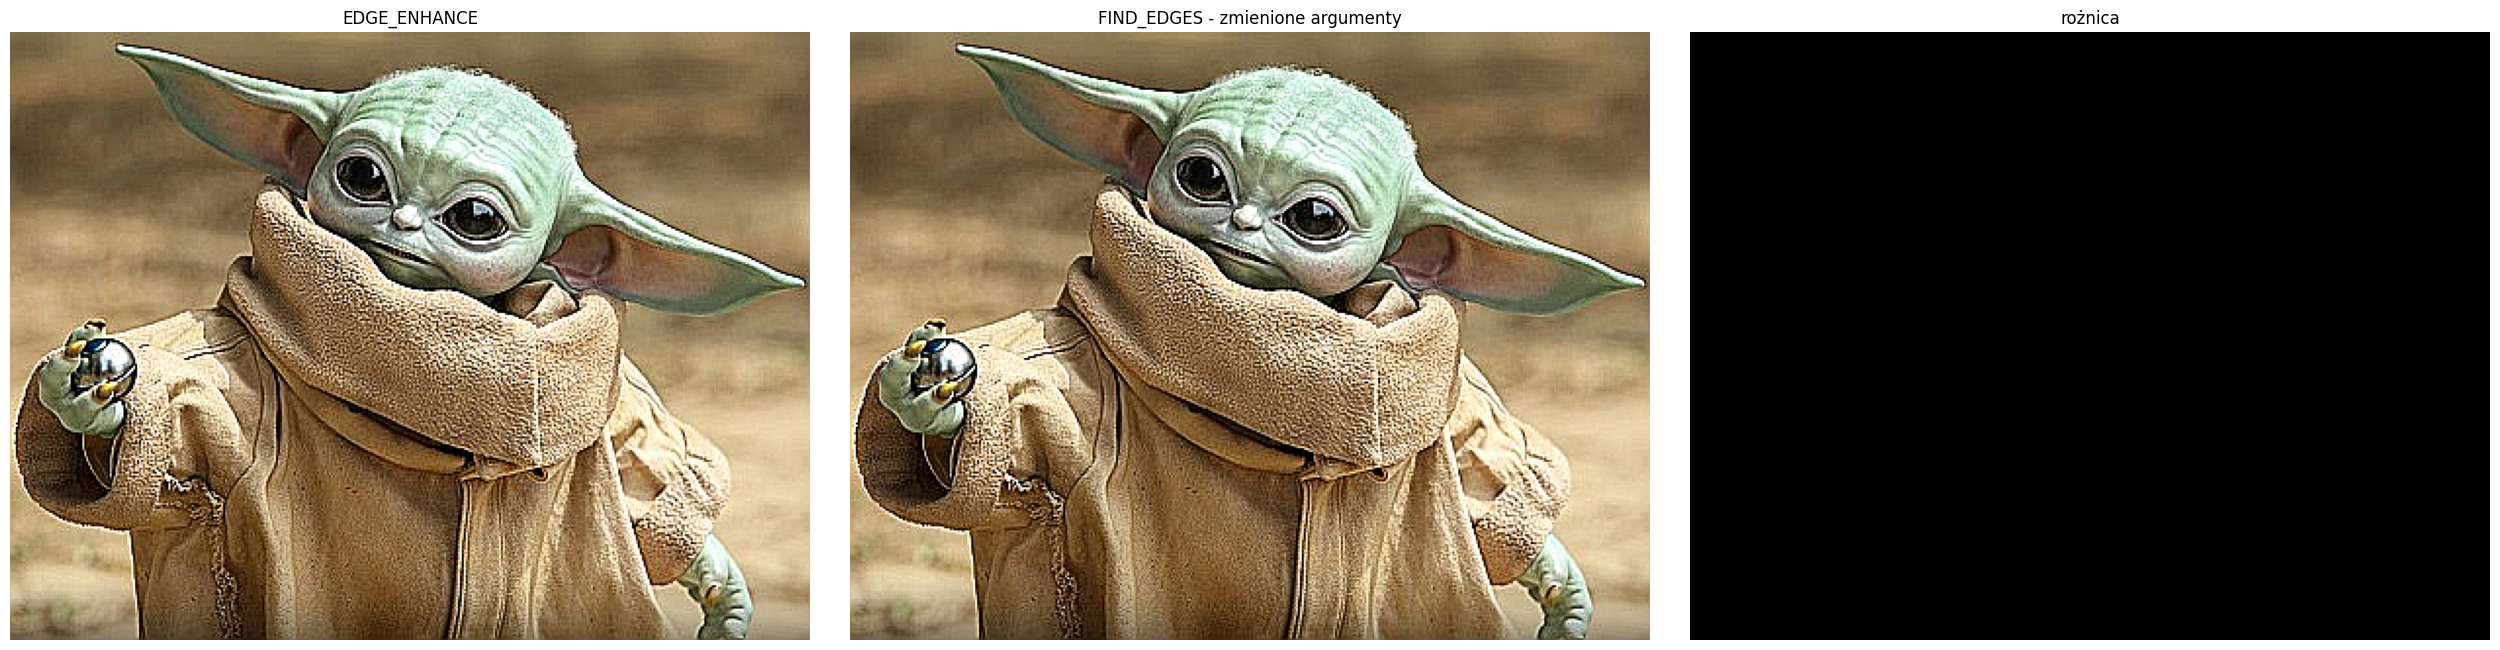

In [62]:
im1 = im.filter(ImageFilter.EDGE_ENHANCE)
ImageFilter.FIND_EDGES.filterargs = ((3, 3), 2, 0, (-1, -1, -1, -1, 10, -1, -1, -1, -1)) 
im2 = im.filter(ImageFilter.FIND_EDGES)
roznica = ImageChops.difference(im1, im2)

plt.figure(figsize=(32, 16))
plt.subplot(1,3,1) # 
plt.title("EDGE_ENHANCE")
plt.imshow(im1)
plt.axis('off')
plt.subplot(1,3,2)
plt.title("FIND_EDGES - zmienione argumenty")
plt.imshow(im2)
plt.axis('off')
plt.subplot(1,3, 3)
plt.title("rożnica")
plt.imshow(roznica)
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [63]:
statystyki(roznica)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [127199, 127199, 127199]
mean  [0.0, 0.0, 0.0]
rms  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


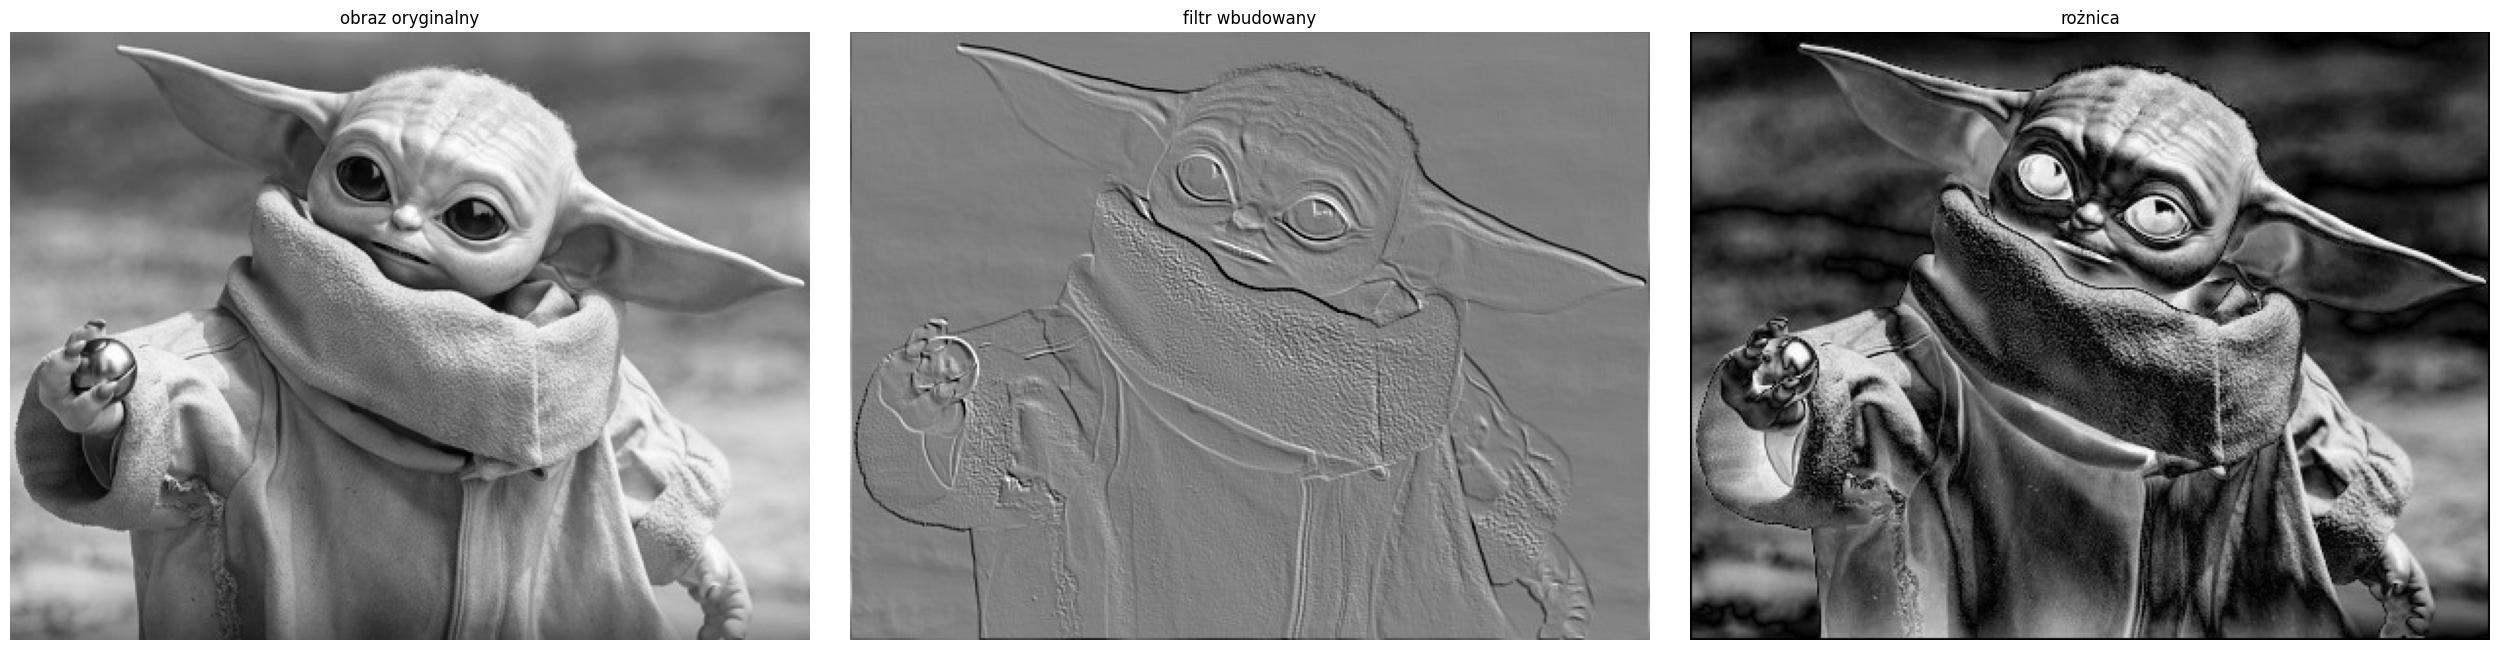

In [64]:
sz = im.convert('L')

sz1 = sz.filter(ImageFilter.EMBOSS) 

plt.figure(figsize=(32, 16))
plt.subplot(1,3,1) 
plt.title("obraz oryginalny")
plt.imshow(sz, 'gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title("filtr wbudowany")
plt.imshow(sz1, 'gray')
plt.axis('off')
plt.subplot(1,3, 3)
plt.title("rożnica")
plt.imshow(ImageChops.difference(sz, sz1), "gray")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [65]:
print(sz1.mode)
emb = im.filter(ImageFilter.EMBOSS) 
print(emb.mode)

L
RGB


In [66]:
statystyki(sz1)
print('---------------------------------------------')
statystyki(emb)

extrema  [(0, 255)]
count  [127199]
mean  [128.1561097178437]
rms  [129.39505661629767]
median  [128]
stddev  [17.86315254155574]
---------------------------------------------
extrema  [(0, 255), (0, 255), (0, 255)]
count  [127199, 127199, 127199]
mean  [128.36663024080377, 128.1374617724982, 127.71005275198705]
rms  [129.58211137738854, 129.40353471894747, 129.04352994146316]
median  [128, 128, 128]
stddev  [17.706830028062267, 18.057289061744676, 18.503379308601637]
